# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Load Dataset

In [2]:
data = pd.read_csv("SLR.csv")

### 2.1 Show Dataset

In [3]:
data.head(20)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


### 2.2 Describe Dataset

In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


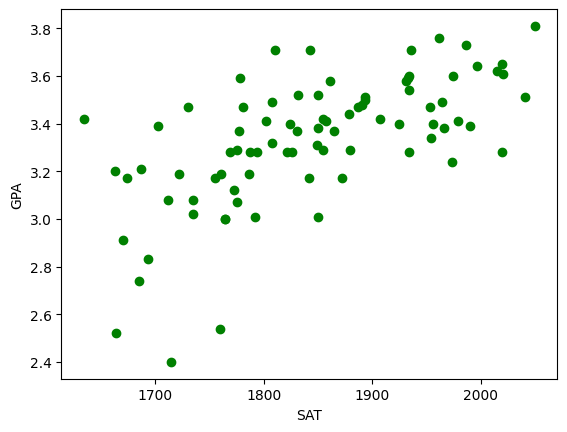

In [5]:
SAT = data["SAT"]
GPA = data["GPA"]

plt.scatter(SAT, GPA, color="g")
plt.xlabel("SAT")
plt.ylabel("GPA")

plt.show()

In [6]:
data.insert(0,"Ones",1)

In [7]:
data.shape

(84, 3)

In [8]:
cols = data.shape[1]
Features = data.iloc[: , 0:cols-1]
Results = data.iloc[: , cols-1:cols]

In [9]:
Features.head(10)

,Ones,SAT
0,1,1714
1,1,1664
2,1,1760
3,1,1685
4,1,1693
5,1,1670
6,1,1764
7,1,1764
8,1,1792
9,1,1850


In [10]:
Results.head(10)

,GPA
0,2.40
1,2.52
2,2.54
3,2.74
4,2.83
5,2.91
6,3.00
7,3.00
8,3.01
9,3.01


In [11]:
Features = np.matrix(Features.values)
Results = np.matrix(Results.values)
theta = np.matrix( np.array([0 , 0]) )

In [12]:
print(Features.shape)
print(Results.shape)
print(theta.shape)

(84, 2)
(84, 1)
(1, 2)


# 3. Cost Fuction

In [13]:
def CalcCost(x,y,t):
    z = np.power( ((x * t.T) - y),2)
    return np.sum(z) / (2 * len(x))

### 3.1 Testing Cost Function 

In [14]:
print( CalcCost(Features , Results , theta) )

5.581691666666667


# 4.Gradiant Descent

In [15]:
def GradiantDescent(x, y, theta, alpha, iters):
    temp = np.matrix( np.zeros(theta.shape) )
    parameters = int( theta.ravel().shape[1] )
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for ii in range(parameters):
            term = np.multiply(error, x[ : , ii])
            temp[0,ii] = theta[0,ii] - ( (alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = CalcCost(x, y, theta)
        
    return theta,cost

In [32]:
alpha = 0.0000001
iters = 20

g,cost = GradiantDescent(Features, Results, theta, alpha, iters)

print("g =", g)
print("cost =", cost[0:20])
print("CalcCost =", CalcCost(Features, Results, g))

g = [[9.76197377e-07 1.80384464e-03]]
cost = [2.43206581 1.06666347 0.47474442 0.21814009 0.10689889 0.05867443
 0.03776852 0.02870555 0.02477664 0.02307341 0.02233503 0.02201494
 0.02187617 0.02181602 0.02178994 0.02177863 0.02177373 0.02177161
 0.02177069 0.02177029]
CalcCost = 0.021770288812162756


# 5. Best Fit Line

In [33]:
x = np.linspace( data["SAT"].min() , data["SAT"].max() , 100)
f = g[0 , 0] + ( g[ 0 , 1] * x)
print(f)

[2.94748313 2.95506292 2.96264271 2.9702225  2.97780229 2.98538208
 2.99296188 3.00054167 3.00812146 3.01570125 3.02328104 3.03086083
 3.03844063 3.04602042 3.05360021 3.06118    3.06875979 3.07633958
 3.08391938 3.09149917 3.09907896 3.10665875 3.11423854 3.12181833
 3.12939812 3.13697792 3.14455771 3.1521375  3.15971729 3.16729708
 3.17487687 3.18245667 3.19003646 3.19761625 3.20519604 3.21277583
 3.22035562 3.22793542 3.23551521 3.243095   3.25067479 3.25825458
 3.26583437 3.27341417 3.28099396 3.28857375 3.29615354 3.30373333
 3.31131312 3.31889292 3.32647271 3.3340525  3.34163229 3.34921208
 3.35679187 3.36437167 3.37195146 3.37953125 3.38711104 3.39469083
 3.40227062 3.40985042 3.41743021 3.42501    3.43258979 3.44016958
 3.44774937 3.45532917 3.46290896 3.47048875 3.47806854 3.48564833
 3.49322812 3.50080792 3.50838771 3.5159675  3.52354729 3.53112708
 3.53870687 3.54628667 3.55386646 3.56144625 3.56902604 3.57660583
 3.58418562 3.59176541 3.59934521 3.606925   3.61450479 3.6220

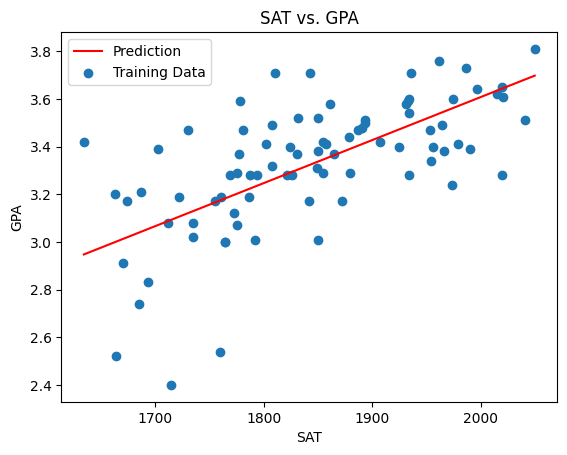

In [34]:
plt.plot(x , f , "r", label="Prediction")
plt.scatter(data["SAT"], data["GPA"], label="Training Data")
plt.legend(loc="upper left")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.title("SAT vs. GPA")
plt.show()

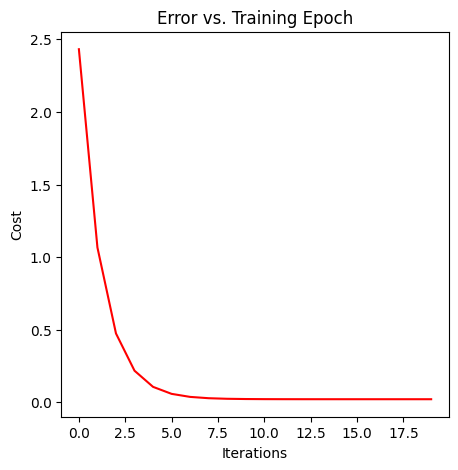

In [35]:
plt.subplots(figsize=(5,5))
plt.plot(np.arange(iters), cost, 'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')

plt.show()